# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle

random.seed(42)
np.random.RandomState = type(42)
pd.options.mode.chained_assignment = None

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для того, чтобы решение было воспроизводимым у проверяющих.")

Для того, чтобы решение было воспроизводимым у проверяющих.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train.to_csv('df_train.csv', index=False)

In [5]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
253,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
4472,Tata Safari DICOR 2.2 LX 4x2,2014,459999,38000,Diesel,Individual,Manual,First Owner,13.93 kmpl,2179 CC,138.03 bhp,320Nm@ 1700-2700rpm,7.0
4628,Hyundai Verna SX Opt,2012,434999,57000,Petrol,Dealer,Manual,First Owner,17.7 kmpl,1497 CC,113.42 bhp,144.15nm@ 4500rpm,5.0
4865,Renault Duster 85PS Diesel RxL Optional,2013,475000,250000,Diesel,Individual,Manual,First Owner,20.46 kmpl,1461 CC,83.8 bhp,200Nm@ 1900rpm,5.0
1506,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2011,550000,168000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
4192,Maruti Swift VVT VXI,2017,509999,46000,Petrol,Individual,Manual,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
4410,Hyundai EON Era Plus,2017,310000,15000,Petrol,Individual,Manual,Second Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
956,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
4902,Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,681000,27000,Diesel,Individual,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0
6421,Hyundai Santro Sportz AMT BSIV,2019,466000,25000,Petrol,Individual,Automatic,Fourth & Above Owner,20.3 kmpl,1086 CC,68 bhp,99Nm@ 4500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [9]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [10]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [12]:
pre_result = df_train.isnull().sum().reset_index()
cols_w_nulls = pre_result[pre_result[0] > 0]['index'].values.tolist()

In [13]:
print("""Пропуски есть в столбцах:""", ', '.join(cols_w_nulls))

Пропуски есть в столбцах: mileage, engine, max_power, torque, seats


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
df_part = df_train.loc[:, df_train.columns != 'selling_price']
df_part['n_flag'] = 1 
n_obj_w_same_features = df_part.groupby(df_part.columns.to_list()[:-1]).sum().query('n_flag > 1').shape[0]

print('В трейне есть объекты, которые дублируются несколько раз. Таких объетов -', n_obj_w_same_features)

В трейне есть объекты, которые дублируются несколько раз. Таких объетов - 624


In [15]:
df_part_test = df_test.loc[:, df_train.columns != 'selling_price']
df_part_test['n_flag'] = 1 
n_obj_w_same_features = df_part_test.groupby(df_part_test.columns.to_list()[:-1]).sum().query('n_flag > 1').shape[0]

print('В тесте есть объекты, которые дублируются несколько раз. Таких объетов -', n_obj_w_same_features)

В тесте есть объекты, которые дублируются несколько раз. Таких объетов - 40


(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [16]:
# для трейна
df_part.groupby(df_part.columns.to_list()[:-1]).sum().query('n_flag > 1').head()

,,,,,,,,,,,,n_flag
name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,
Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
BMW 3 Series 320d Luxury Line,2012,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
BMW 3 Series 320d Luxury Line Plus,2017,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2


In [17]:
# для теста
df_part_test.groupby(df_part_test.columns.to_list()[:-1]).sum().query('n_flag > 1').head()

n_flag
name                          year km_driven fuel   seller_type      transmission owner        mileage    engine  max_power torque              seats        
BMW X4 M Sport X xDrive20d    2019 7500      Diesel Dealer           Automatic    First Owner  16.78 kmpl 1995 CC 190 bhp   400Nm@ 1750-2500rpm 5.0         2
                                   8500      Diesel Dealer           Automatic    First Owner  16.78 kmpl 1995 CC 190 bhp   400Nm@ 1750-2500rpm 5.0         4
Chevrolet Enjoy 1.3 TCDi LS 7 2016 110000    Diesel Individual       Manual       Second Owner 18.2 kmpl  1248 CC 73.74 bhp 172.5Nm@ 1750rpm    7.0         2
Honda Jazz VX                 2016 56494     Petrol Trustmark Dealer Manual       First Owner  18.2 kmpl  1199 CC 88.7 bhp  110Nm@ 4800rpm      5.0         8
Hyundai Elantra S             2016 49900     Petrol Dealer           Manual       First Owner  16.3 kmpl  1797 CC 147.5 bhp 177.5Nm@ 4700rpm    5.0         2

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

In [18]:
cols = ['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 
        'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']

df_train = df_train.drop_duplicates(subset=cols, keep='first')
# df_test = df_test.drop_duplicates(subset=cols, keep='first')

In [19]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [20]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [21]:
df_train['mileage'] = df_train['mileage'].str.split()
df_train['mileage'] = df_train['mileage'].apply(lambda x: x if isinstance(x, float) else x[0])\
                                                    .astype(float)

In [22]:
df_test['mileage'] = df_test['mileage'].str.split()
df_test['mileage'] = df_test['mileage'].apply(lambda x: x if isinstance(x, float) else x[0])\
                                                    .astype(float)

In [23]:
df_train['engine'] = df_train['engine'].str.split()
df_train['engine'] = df_train['engine'].apply(lambda x: x if isinstance(x, float) else x[0])\
                                                    .astype(float)

In [24]:
df_test['engine'] = df_test['engine'].str.split()
df_test['engine'] = df_test['engine'].apply(lambda x: x if isinstance(x, float) else x[0])\
                                                    .astype(float)

In [25]:
df_train['max_power'] = df_train['max_power'].str.split()
df_train['max_power'] = df_train['max_power'].apply(lambda x: np.nan if isinstance(x, float) else x[0])
df_train['max_power'] = df_train['max_power'].apply(lambda x: np.nan if x == 'bhp' else x)\
                                                    .astype(float)

In [26]:
df_test['max_power'] = df_test['max_power'].str.split()
df_test['max_power'] = df_test['max_power'].apply(lambda x: np.nan if isinstance(x, float) else x[0])
df_test['max_power'] = df_test['max_power'].apply(lambda x: np.nan if x == 'bhp' else x)\
                                                    .astype(float)

In [27]:
df_train.drop(columns='torque', inplace=True)
df_test.drop(columns='torque', inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [28]:
df_train.loc[df_train.mileage.isna(), 'mileage'] = df_train.mileage.quantile(0.5)
df_train.loc[df_train.engine.isna(), 'engine'] = df_train.engine.quantile(0.5)
df_train.loc[df_train.max_power.isna(), 'max_power'] = df_train.max_power.quantile(0.5)
df_train.loc[df_train.seats.isna(), 'seats'] = df_train.seats.quantile(0.5)

df_test.loc[df_test.mileage.isna(), 'mileage'] = df_train.mileage.quantile(0.5)
df_test.loc[df_test.engine.isna(), 'engine'] = df_train.engine.quantile(0.5)
df_test.loc[df_test.max_power.isna(), 'max_power'] = df_train.max_power.quantile(0.5)
df_test.loc[df_test.seats.isna(), 'seats'] = df_train.seats.quantile(0.5)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
print("Потому что 5 сидений не лучше и не хуже 4 и т.д. Их сложно сравнивать. Поэтому лучше ее сделать категориальной.")

Потому что 5 сидений не лучше и не хуже 4 и т.д. Их сложно сравнивать. Поэтому лучше ее сделать категориальной.


In [30]:
df_train['seats'] = df_train.seats.astype(int)
df_train['engine'] = df_train.engine.astype(int)

df_test['seats'] = df_test.seats.astype(int)
df_test['engine'] = df_test.engine.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

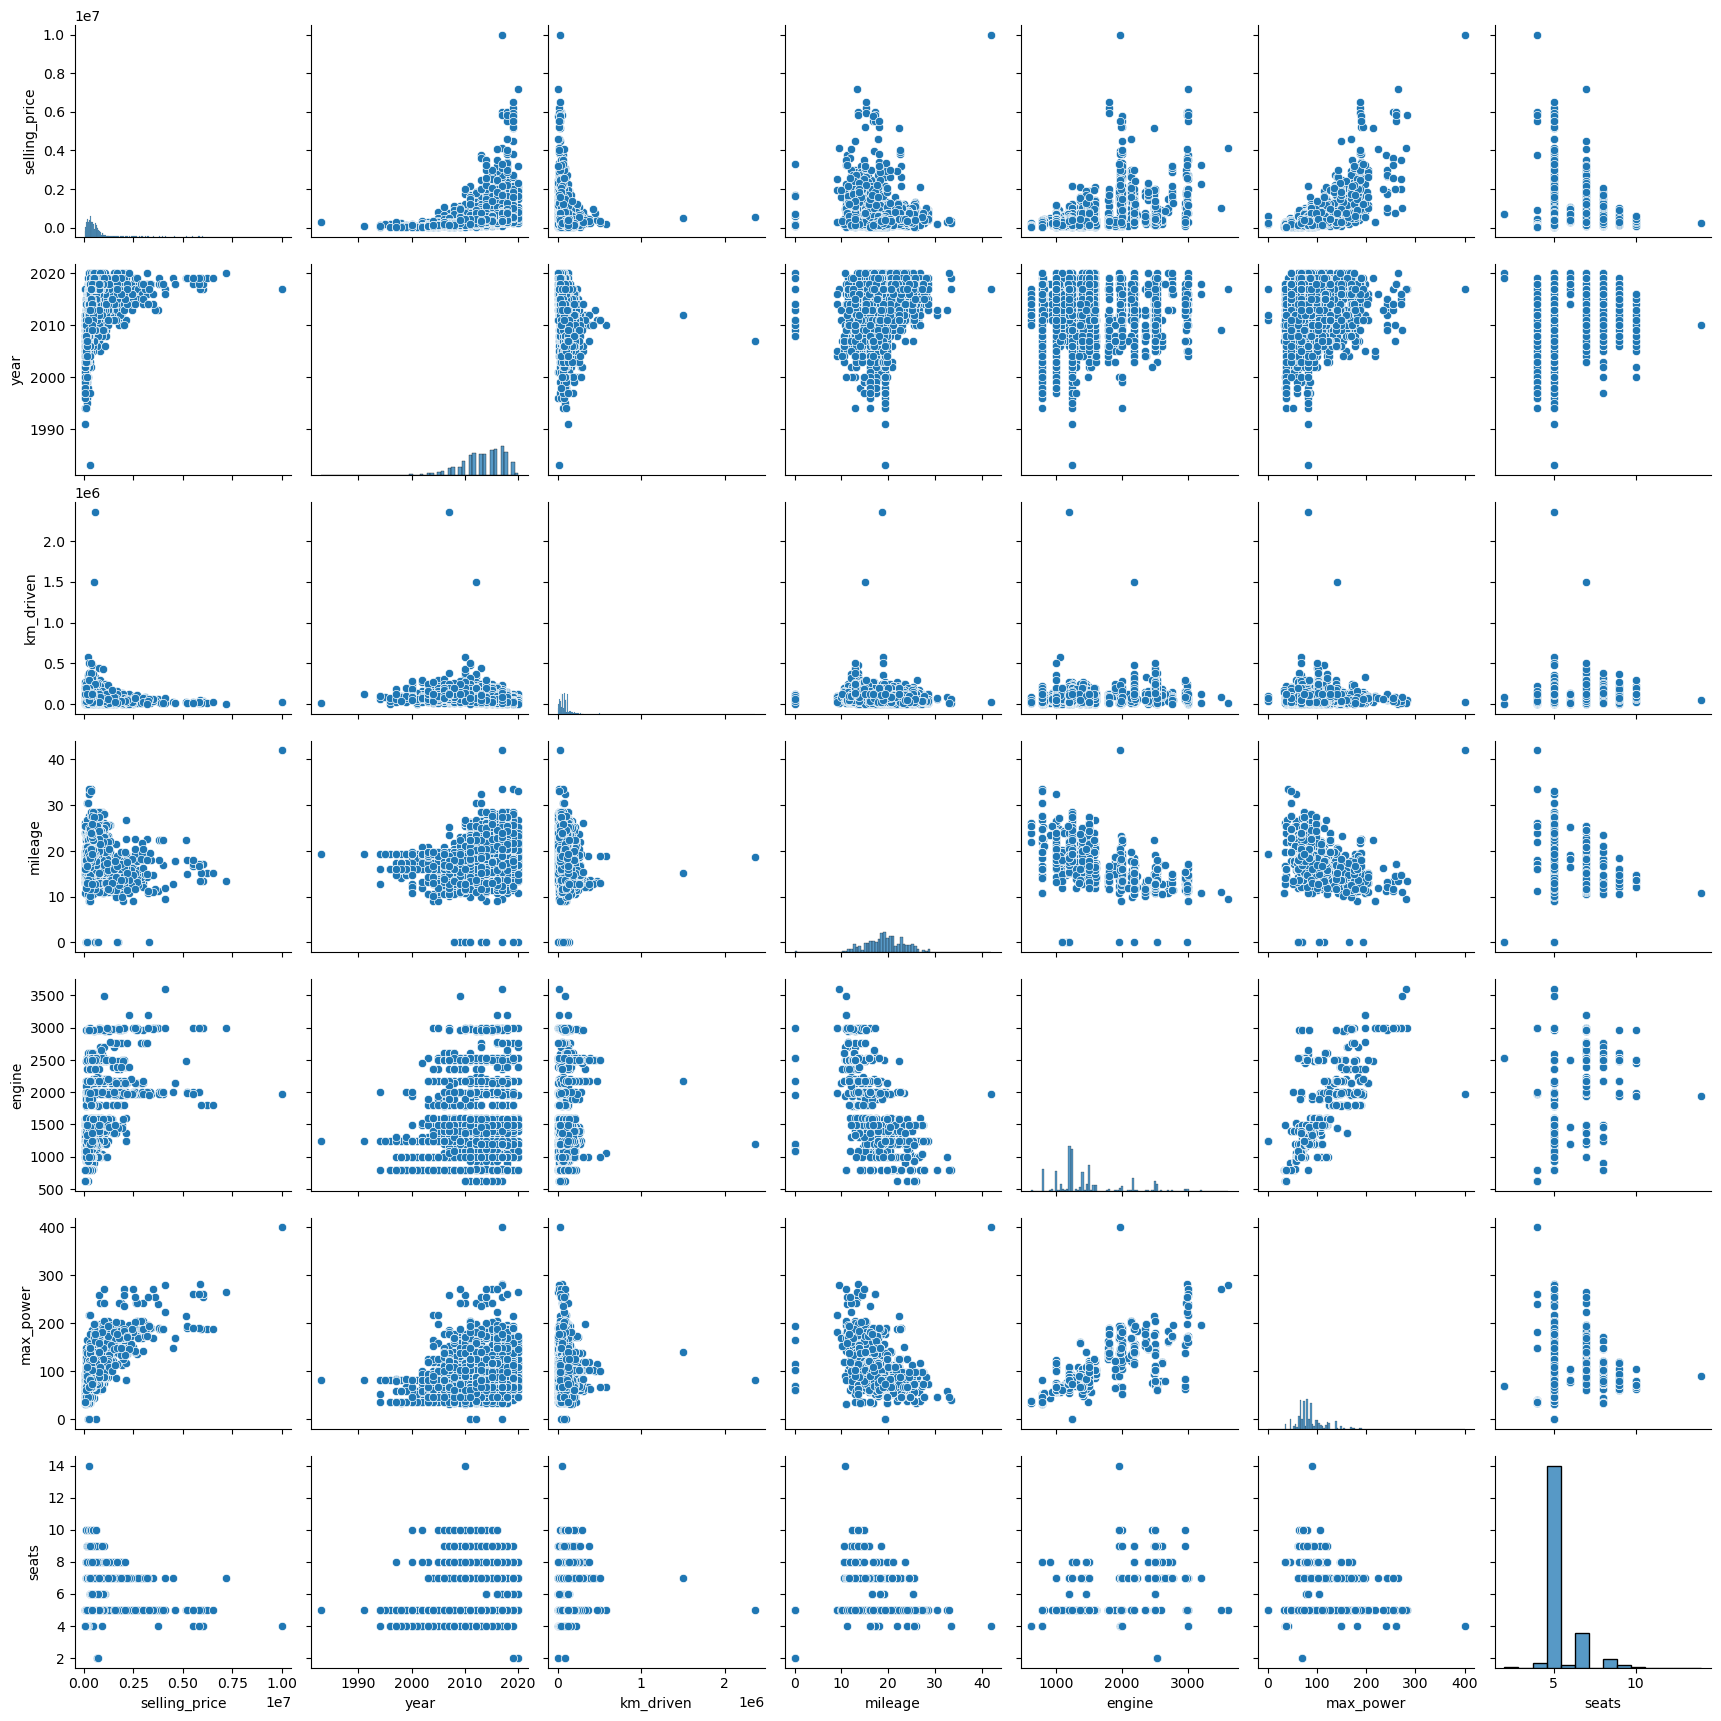

In [31]:
cols = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

sns.pairplot(df_train[cols])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Видно, что стоимость автомобиля в какой-то степени зависит от engine и max_power
2. max_power и engine коррелируют друг с другом

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

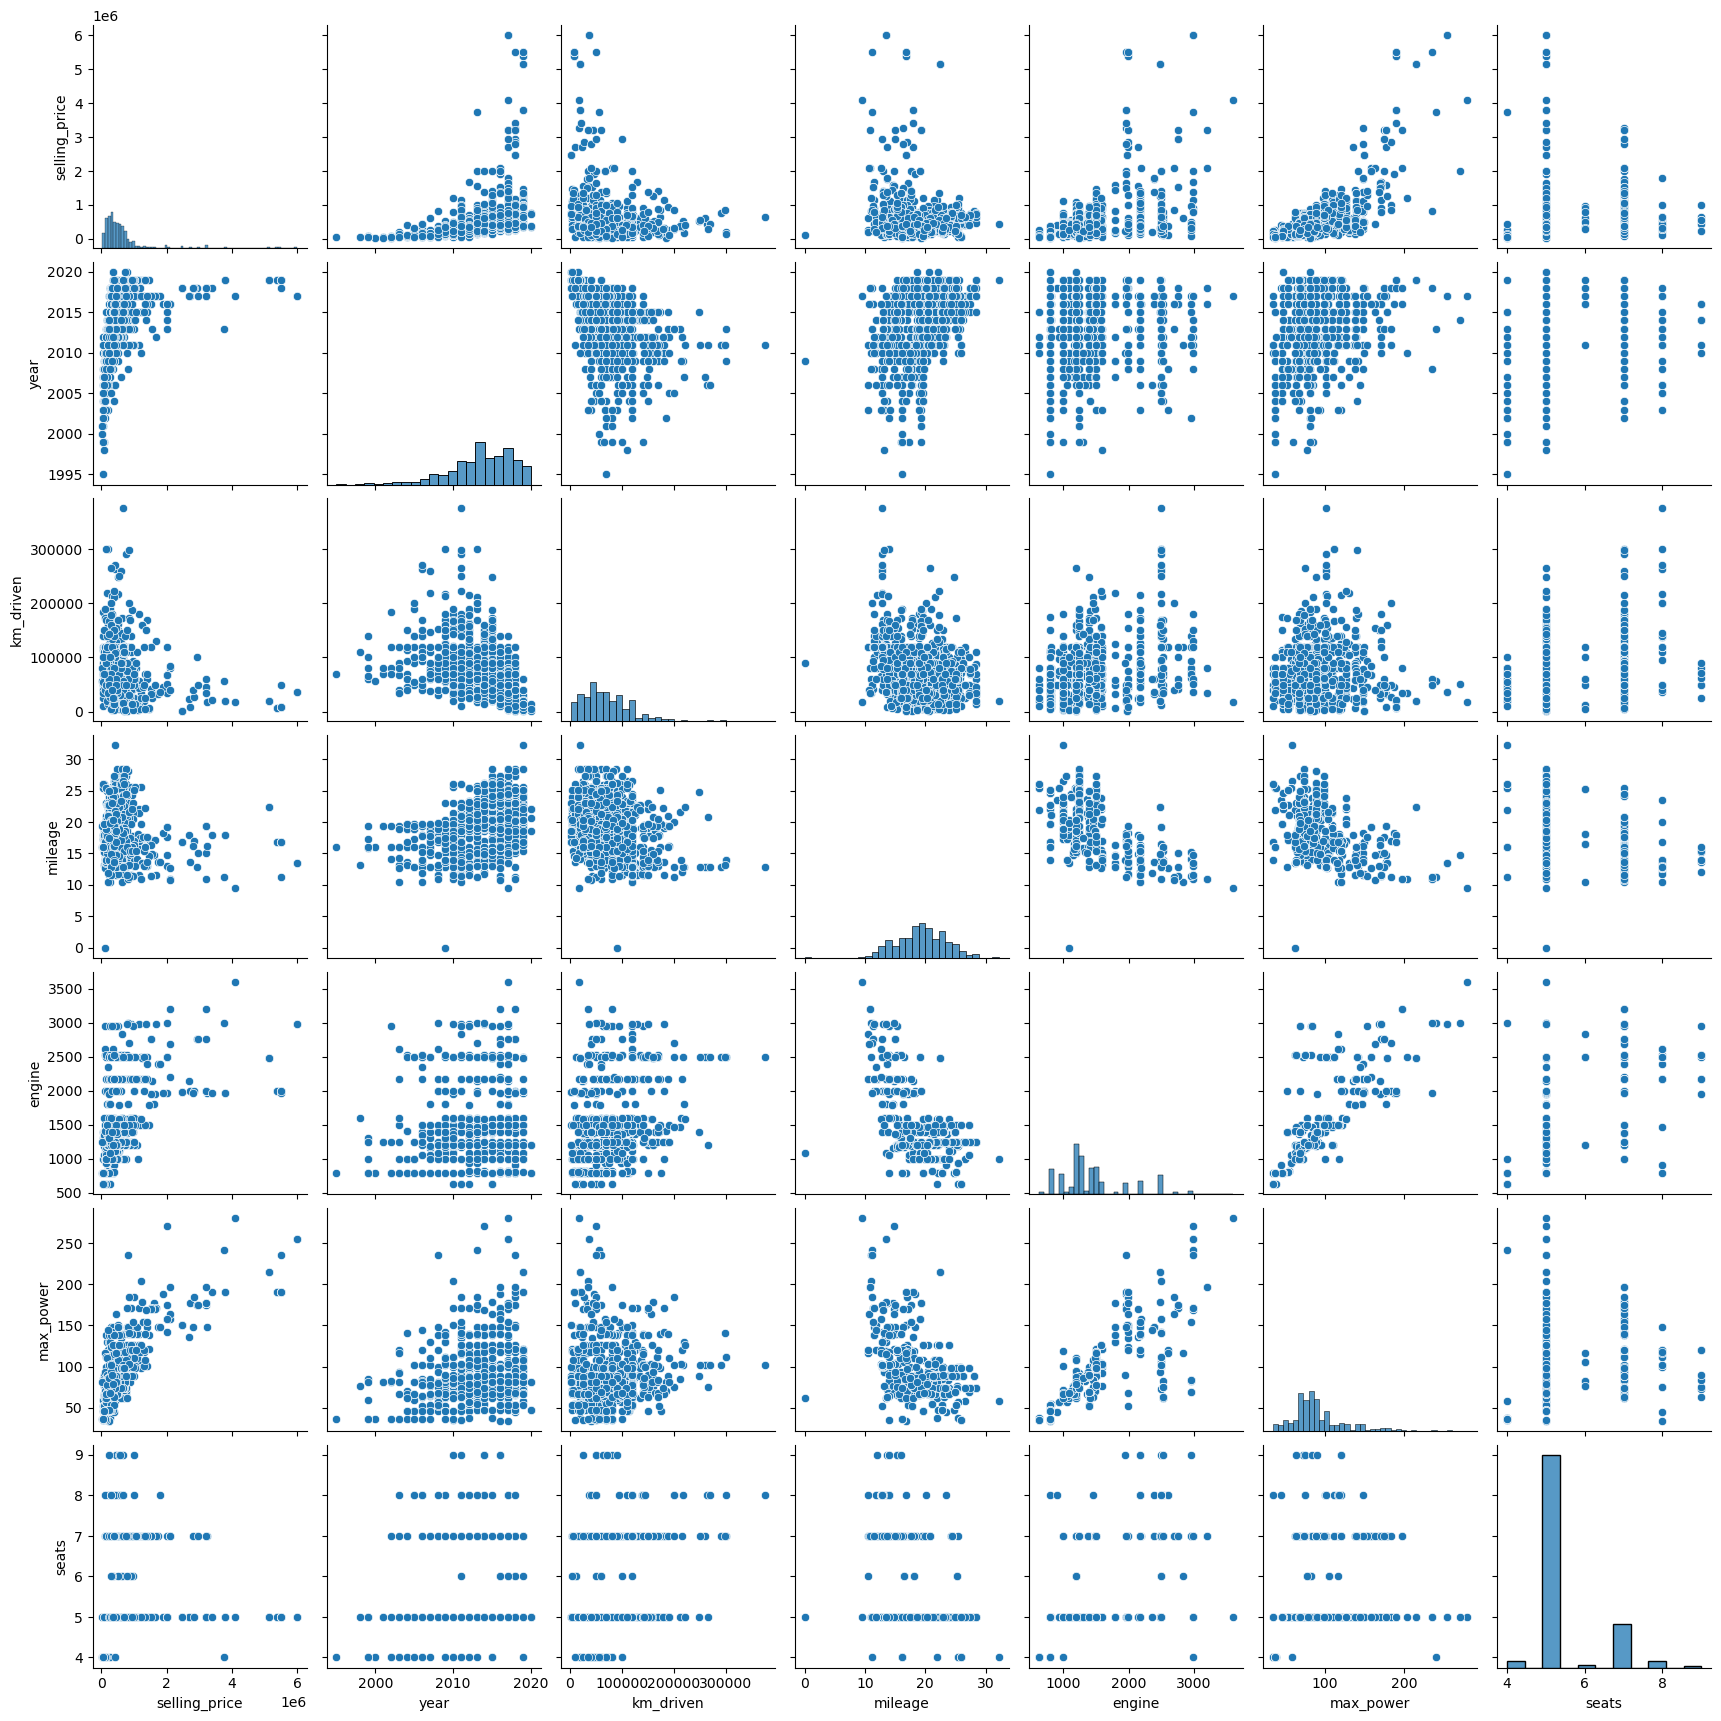

In [32]:
sns.pairplot(df_test[cols])

В целом, зависимости остались теми же.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot: >

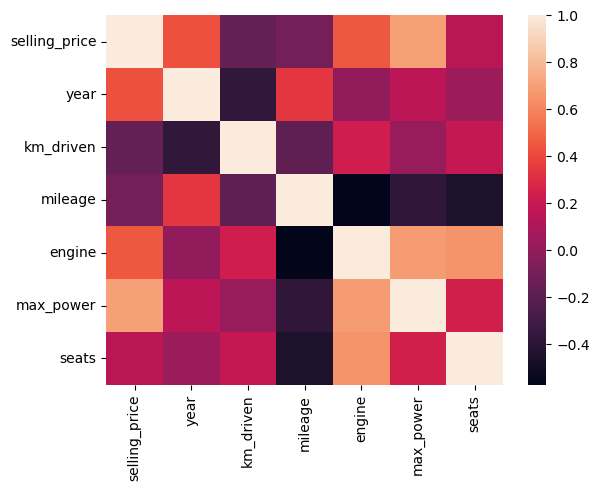

In [33]:
sns.heatmap(df_train[cols].corr())

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. year и engine или year и max_power  
2. между engine и max_power  
3. в целом, да. корреляция между ними отрицательная.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

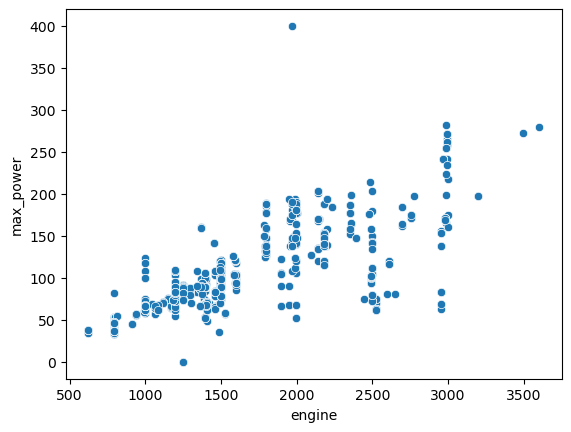

In [34]:
sns.scatterplot(data=df_train, x="engine", y="max_power")
plt.show()

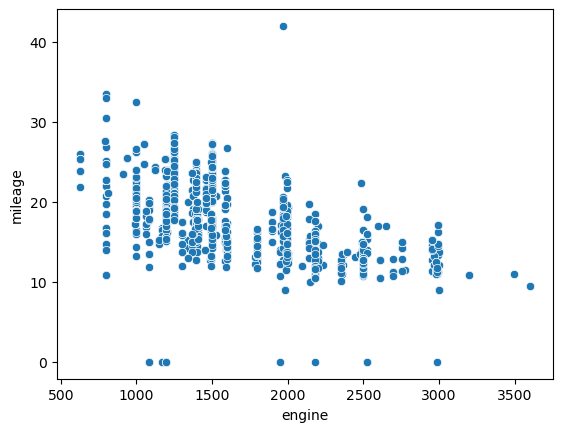

In [35]:
sns.scatterplot(data=df_train, x="engine", y="mileage")
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

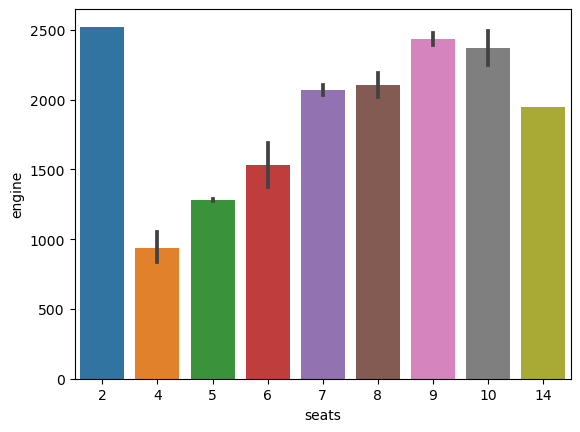

In [36]:
# есть зависимость между количество мест и мощностью двигателя. 
# Возможно, имеет смысл от какого-то из этх признаков избавиться перед обучением линейно модели.
sns.barplot(data=df_train, x='seats', y='engine')
plt.show()

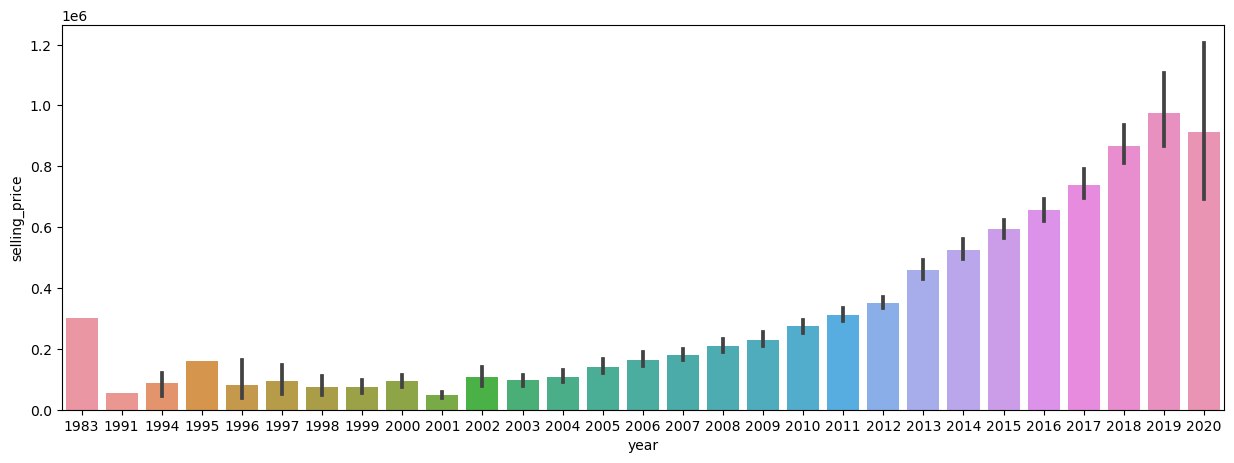

In [37]:
# есть прикольная зависимость между маргетом и годом выпуска (она очевидная, но на это графике видно лучше)
plt.figure(figsize=(15, 5))
sns.barplot(data=df_train, x='year', y='selling_price')
plt.show()

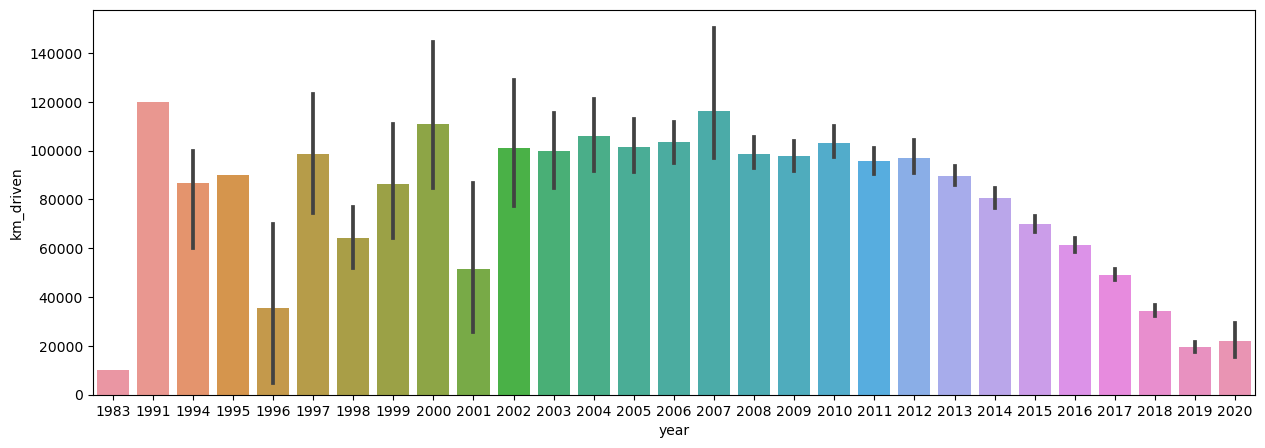

In [38]:
# есть зависимость между годом производства и кол-вом пройденных километров. 
# хотя, что интересно, между 1983 и 2020 особой разницы нет. 
# Далее идет резкий рост, который сохраняется до 2012 года. Затем идет небольшой и постепенный спад в кол-ве пройденных км.
# Возможно, это 
plt.figure(figsize=(15, 5))
sns.barplot(data=df_train, x='year', y='km_driven')
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [39]:
y_train = df_train['selling_price']
X_train = df_train[cols[1:]]

In [40]:
assert X_train.shape == (5840, 6)

In [41]:
y_test = df_test['selling_price']
X_test = df_test[cols[1:]]

In [42]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
# test
print('R2:', r2_score(y_test, y_pred))
print('MSE:', MSE(y_test, y_pred))

R2: 0.5941419794788412
MSE: 233298779730.45587


In [45]:
# train
print('R2:', r2_score(y_train, model.predict(X_train)))
print('MSE:', MSE(y_train, model.predict(X_train)))

R2: 0.5922591702157305
MSE: 116874153930.02885


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(data=X_train_standard, columns=scaler.get_feature_names_out())
X_test_standard = pd.DataFrame(data=X_test_standard, columns=scaler.get_feature_names_out())

model = LinearRegression()
model.fit(X_train_standard, y_train)

y_pred = model.predict(X_test_standard)

In [47]:
# test
print('R2:', r2_score(y_test, y_pred))
print('MSE:', MSE(y_test, y_pred))

R2: 0.5941419794788517
MSE: 233298779730.44977


In [48]:
# train
print('R2:', r2_score(y_train, model.predict(X_train_standard)))
print('MSE:', MSE(y_train, model.predict(X_train_standard)))

R2: 0.5922591702157303
MSE: 116874153930.02892


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [49]:
coefs = list(zip(model.coef_, X_train.columns))
coefs.sort()
coefs

[(-44158.81852005285, 'km_driven'),
 (-23209.132485997343, 'seats'),
 (28833.925777517372, 'mileage'),
 (61178.49433684779, 'engine'),
 (152772.57084581399, 'year'),
 (322807.35325923364, 'max_power')]

Кажется, что самый информативный признак - max_power. У него самый большой коэффициент. 

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_standard, y_train)

Lasso()

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
model_lasso.coef_

coefs = list(zip(model_lasso.coef_, X_train.columns))
coefs.sort()
coefs

[(-44157.68985794262, 'km_driven'),
 (-23206.255649080093, 'seats'),
 (28832.043395883917, 'mileage'),
 (61173.66240922125, 'engine'),
 (152772.39021419562, 'year'),
 (322808.2369194696, 'max_power')]

Нет, не занулила, так как все признаки важны.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [52]:
from sklearn.model_selection import GridSearchCV

model_lasso = Lasso()
param_grid = {'alpha': [i/10 for i in range(1, 10)]}

clf = GridSearchCV(model_lasso, param_grid, cv=10)

In [53]:
clf.fit(X_train_standard, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

 9 моделей. По одной на каждый параметр.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [54]:
best_alpha = clf.best_params_['alpha']

In [55]:
model_lasso = Lasso(alpha=best_alpha)
model_lasso.fit(X_train_standard, y_train)
model_lasso.coef_

array([152772.40986398, -44157.80134105,  28832.22835507,  61174.13882437,
       322808.15087412, -23206.54128946])

Ничего не занулилось. Видимо, все признаки важны.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [56]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
param_grid = {'alpha': [i/10 for i in range(1, 10)],
             'l1_ratio': [i/10 for i in range(1, 10)]}

clf = GridSearchCV(model_elastic, param_grid, cv=10)

clf.fit(X_train_standard, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [57]:
params = clf.best_params_
params

{'alpha': 0.5, 'l1_ratio': 0.7}

In [58]:
model_elastic = ElasticNet(**params)
model_elastic.fit(X_train_standard, y_train)

y_pred = model_elastic.predict(X_test_standard)

r2_score(y_test, y_pred)

0.5615212680214641

Предлагаем вам оставить попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [59]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])

In [60]:
assert X_train_cat.shape == (5840, 10)

In [61]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [62]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat.seats = X_train_cat.seats.astype(str)

categories = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
matrix_tmp = one_hot_encoder.fit_transform(X_train_cat[categories])

cat_cols_names = one_hot_encoder.get_feature_names_out()

X_train_cat = pd.DataFrame(data=matrix_tmp, columns=cat_cols_names)
X_train_final = pd.concat([X_train_standard, X_train_cat], axis=1)

In [63]:
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

X_test_cat.seats = X_test_cat.seats.astype(str)

matrix_tmp = one_hot_encoder.transform(X_test_cat[categories])

cat_cols_names = one_hot_encoder.get_feature_names_out()

X_test_cat = pd.DataFrame(data=matrix_tmp, columns=cat_cols_names)
X_test_final = pd.concat([X_test_standard, X_test_cat], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge()
param_grid = {'alpha': [i/10 for i in range(1, 10)]}

clf = GridSearchCV(model_ridge, param_grid, cv=10, scoring='r2')

clf.fit(X_train_final, y_train)
clf.best_params_

{'alpha': 0.9}

In [65]:
model_ridge = Ridge(alpha=0.9)
model_ridge.fit(X_train_final, y_train)
y_pred = model_ridge.predict(X_train_final)

# train
print('R2:', r2_score(y_train, y_pred))

R2: 0.6663917165771913


In [66]:
y_pred = model_ridge.predict(X_test_final)

# test
print('R2:', r2_score(y_test, y_pred))

R2: 0.6329860461393055


Качество предсказаний улучшилось, R2 - вырос :)

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [67]:
from datetime import datetime as dt
categories = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

X_train_nums = df_train[num_cols]
X_test_nums = df_test[num_cols]
X_train_cat = df_train[categories]
X_test_cat = df_test[categories]

# Сгенерировать новые признаки на основе уже существующих
X_train_nums.loc[:, 'max_power_2'] = (X_train.loc[:, 'max_power'])**2
X_train_nums.loc[:, 'mileage_2'] = X_train.loc[:, 'mileage']**2
X_train_nums.loc[:, 'year_2'] = X_train.loc[:, 'year']**2

X_test_nums.loc[:, 'max_power_2'] = (X_test.loc[:, 'max_power'])**2
X_test_nums.loc[:, 'mileage_2'] = X_test.loc[:, 'mileage']**2
X_test_nums.loc[:, 'year_2'] = X_test.loc[:, 'year']**2


#Добыть новые признаки
num_owner = {
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4,
    'Test': 0
}

X_train_nums.loc[:, 'owner_num'] = df_train['owner'].str.split().apply(lambda x: num_owner[x[0]])
X_test_nums.loc[:, 'owner_num'] = df_test['owner'].str.split().apply(lambda x: num_owner[x[0]])

X_train_cat.loc[:, 'model'] = df_train.name.str.split().apply(lambda x: x[0])
X_test_cat.loc[:, 'model'] = df_test.name.str.split().apply(lambda x: x[0])

X_train_cat.seats = X_train_cat.seats.astype(str)
X_test_cat.seats = X_test_cat.seats.astype(str)

X_train_nums.head()

,year,km_driven,mileage,engine,max_power,max_power_2,mileage_2,year_2,owner_num
0,2014,145500,23.40,1248,74.00,5476.0000,547.5600,4056196,1
1,2014,120000,21.14,1498,103.52,10716.3904,446.8996,4056196,2
2,2010,127000,23.00,1396,90.00,8100.0000,529.0000,4040100,1
3,2007,120000,16.10,1298,88.20,7779.2400,259.2100,4028049,1
4,2017,45000,20.14,1197,81.86,6701.0596,405.6196,4068289,1


In [68]:
num_cols = ['year', 'km_driven', 'mileage_2', 'max_power', 'engine', 
            'max_power_2', 'year_2', 'mileage', 'owner_num']

categories = ['fuel', 'seller_type', 'transmission', 'seats', 'model']

scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train_nums[num_cols])
X_test_standard = scaler.transform(X_test_nums[num_cols])

X_train_standard = pd.DataFrame(data=X_train_standard, columns=scaler.get_feature_names_out())
X_test_standard = pd.DataFrame(data=X_test_standard, columns=scaler.get_feature_names_out())

# ---------------------- train -----------------------------------

one_hot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'ignore')

matrix_tmp = one_hot_encoder.fit_transform(X_train_cat[categories])

cat_cols_names = one_hot_encoder.get_feature_names_out()

X_train_cat = pd.DataFrame(data=matrix_tmp, columns=cat_cols_names)
X_train_final = pd.concat([X_train_standard, X_train_cat], axis=1)

# ---------------------- test -----------------------------------

matrix_tmp = one_hot_encoder.transform(X_test_cat[categories])

cat_cols_names = one_hot_encoder.get_feature_names_out()

X_test_cat = pd.DataFrame(data=matrix_tmp, columns=cat_cols_names)
X_test_final = pd.concat([X_test_standard, X_test_cat], axis=1)

model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

# test
print('R2:', r2_score(y_test, y_pred)) #ну, пока это лучший результат

R2: 0.8264842454361201


/Users/vinyutsina/miniconda3/envs/mlds_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [69]:
sorted(list(zip(model.coef_, X_test_final.columns)))

[(-47584101.76188317, 'year'),
 (-170924.3571352139, 'max_power'),
 (-118915.82453907281, 'mileage_2'),
 (-108992.81198872678, 'model_Datsun'),
 (-106476.6120261669, 'seats_6'),
 (-83740.76020576467, 'seller_type_Individual'),
 (-54203.65903451878, 'model_Peugeot'),
 (-51667.30615531141, 'seller_type_Trustmark Dealer'),
 (-48162.113975627886, 'seats_2'),
 (-46943.34158053732, 'seats_5'),
 (-44374.768339134025, 'model_Tata'),
 (-43614.7327537086, 'model_Force'),
 (-40333.40514223784, 'transmission_Manual'),
 (-40028.11699204118, 'seats_8'),
 (-17627.79778328864, 'owner_num'),
 (-14320.564053572714, 'km_driven'),
 (-8349.21784008178, 'seats_9'),
 (-5284.940493331504, 'seats_14'),
 (4508.182856215906, 'model_Chevrolet'),
 (6911.241645670205, 'seats_7'),
 (17440.943958908574, 'model_Renault'),
 (22950.62498071324, 'engine'),
 (32440.883011806698, 'model_Mahindra'),
 (33852.44358828833, 'model_Fiat'),
 (37566.93526247342, 'fuel_Petrol'),
 (43328.87157372283, 'model_Volkswagen'),
 (50729.442

In [70]:
with open('model_weights/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [71]:
with open('model_weights/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [72]:
def business_metrics(y_true, y_pred):
    
    y_diff = abs(y_true - y_pred)/y_true
    pre_nom = list(map(lambda x: 1 if x < 0.1 else 0, y_diff))
    nom = sum(pre_nom)
    denom = len(pre_nom)
    
    return nom/denom

business_metrics(y_test, y_pred)

0.286

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

In [73]:
best_ridge = model

In [74]:
import pickle

with open('model_weights/ridge_model.pkl', 'wb') as f:
    pickle.dump(best_ridge, f, protocol=pickle.HIGHEST_PROTOCOL)

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [75]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link